# 01 — Datasets, Scaling & PCA Preview

Ebben a notebookban különböző adatkészleteket készítünk klaszterezési kísérletekhez, majd
- standardizáljuk őket (átlag=0, szórás=1),
- és PCA (főkomponens-analízis) segítségével 2D-ben megjelenítjük.

Ez segít vizuálisan megérteni, milyen formájú adatokat kapnak a klaszterező algoritmusok.

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from src.datasets import make_all_datasets

datasets = make_all_datasets()
print("Datasets loaded:", list(datasets.keys()))

Datasets loaded: ['blobs', 'moons', 'circles', 'iris']


## Miért kell skálázni? 🔍

A klaszterezési algoritmusok (k-means, DBSCAN, stb.) **távolságokat** használnak a pontok közötti hasonlóság méréséhez.

**Probléma**: Ha az egyik feature értékei 0-1 között vannak, a másik pedig 0-1000 között, akkor a nagyobb skálájú feature dominálni fog a távolságszámításban.

**Megoldás**: **StandardScaler** → minden feature-t 0 átlagúra és 1 szórásúra transzformál.

```python
# Példa:
# Előtte: [kor: 25, jövedelem: 50000]
# Utána:  [kor: -0.5, jövedelem: 0.8]
```

---

## Miért használunk PCA-t? 📊

A **PCA (Principal Component Analysis)** csak **vizualizációhoz** szükséges, **nem befolyásolja a klaszterezést**.

**Miért?** 4D vagy magasabb dimenziós adatot nem tudunk megjeleníteni 2D-ben, ezért a 2 legfontosabb dimenzióra (főkomponensre) vetítünk.

**Fontos**: A klaszterezés az eredeti (de skálázott) adatokon fut, a PCA csak a megjelenítéshez kell!

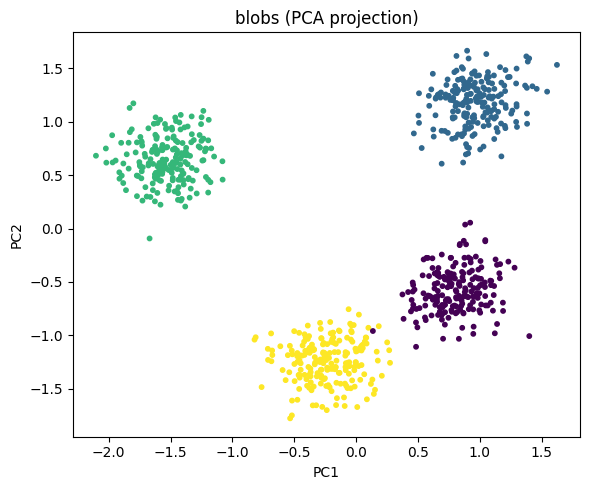

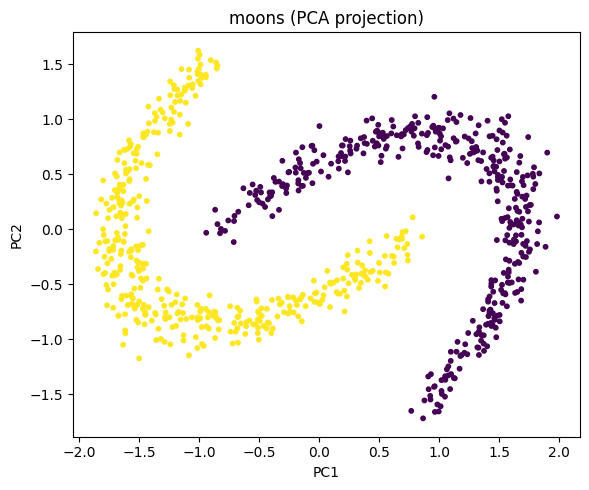

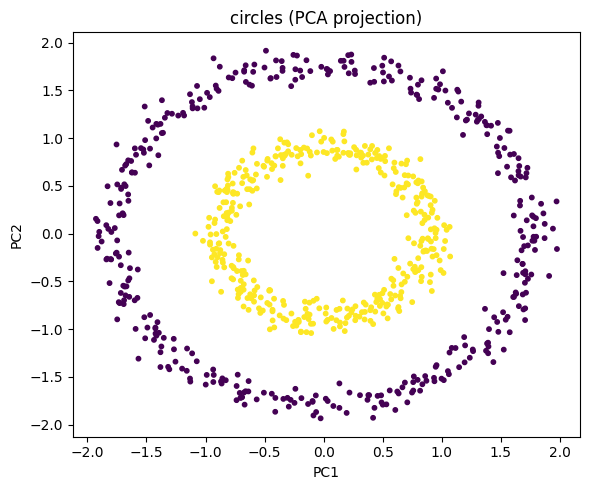

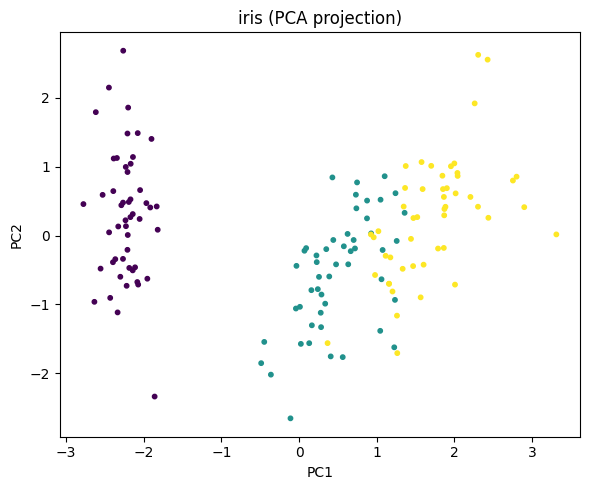

In [2]:
def plot_pca_projection(X, y=None, title="PCA 2D projection"):
    """Skálázás + PCA + scatter plot"""
    X_scaled = StandardScaler().fit_transform(X)
    X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
    plt.figure(figsize=(6,5))
    if y is not None:
        plt.scatter(X_pca[:,0], X_pca[:,1], s=10, c=y, cmap="viridis")
    else:
        plt.scatter(X_pca[:,0], X_pca[:,1], s=10, color="gray")
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.show()

for name, (X, y, k) in datasets.items():
    plot_pca_projection(X, y, f"{name} (PCA projection)")